In [40]:
pip install annoy

In [41]:
# Unzipping training data for transfer learning
%%capture
#!unzip /content/drive/MyDrive/Hosted_Datasets/ML_Project/Training_Dataset_Ashraf.zip
!unzip /content/drive/MyDrive/Hosted_Datasets/ML_Project/Animal_classes_93.zip

In [6]:
# unzipping gallery dataset to use in future for finding images similar to query
%%capture
!unzip /content/drive/MyDrive/Hosted_Datasets/ML_Project/dataset_test_final.zip

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [42]:
# For commands
import os
os.chdir('/content/')
import time
from tqdm.notebook import tqdm
import warnings
warnings.filterwarnings('ignore')
# For array manipulation
import numpy as np
import pandas as pd
import pandas.util.testing as tm
# For visualization
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import cv2
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import imageio as io
from pylab import *
from sklearn.manifold import TSNE
#For model performance
from sklearn.metrics import pairwise_distances
from sklearn.metrics.pairwise import cosine_similarity
import joblib
#For model training
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import tensorflow as tf
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.models import Sequential
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, UpSampling2D
from tensorflow.keras.optimizers import Adam, Adagrad, RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
from keras.models import load_model
from keras.preprocessing import image
from tqdm import tqdm
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras
from PIL import Image
from annoy import AnnoyIndex
from tqdm import tqdm
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from PIL import Image 
import os 
from IPython.display import display
from IPython.display import Image as _Imgd
from glob import glob
import matplotlib.pyplot as plt
from datetime import datetime
from keras.models import load_model

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

Populating the interactive namespace from numpy and matplotlib


In [ ]:
# # unzipping train dataset for training transfer learning model
# %%capture
# !unzip /content/drive/MyDrive/Hosted_Datasets/ML_Project/Master_train_dataset.zip

In [43]:
IMAGE_SIZE = [224, 224]
train_path = '/content/Animal_classes_93/animals/animals'

# VGG16 model imported
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

for layer in vgg.layers:
  layer.trainable = False

58900480/58889256 [==============================] - 0s 0us/step


In [44]:
folders = glob('/content/Animal_classes_93/animals/animals/*')
print("Our training set has "+str(len(folders)) + " classes")

Our training set has 93 classes


In [45]:
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "model_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0  

In [46]:
from tensorflow import keras
import tensorflow as tf 
from keras import optimizers


adam = tf.keras.optimizers.Adam()
model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

In [47]:
from tensorflow.keras.callbacks import EarlyStopping

# earlystop_callback = EarlyStopping(
#   monitor='val_loss', min_delta=0.0001, patience=3)

earlystop_callback = EarlyStopping(
  monitor='val_loss', patience=3)

start = datetime.now()
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=90,
    horizontal_flip=True,
    validation_split=0.2) # set validation split

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    train_path, # same directory as training data
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation') # set as validation data

model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // 32,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // 32,
    epochs = 20,
    callbacks=[earlystop_callback])

model.save('/content/drive/MyDrive/Datasets/saved_transfer_model.h5')


duration = datetime.now() - start
print("Training completed in time: ", duration)

Found 37544 images belonging to 93 classes.
Found 9378 images belonging to 93 classes.
Epoch 1/20
1173/1173 [==============================] - 591s 502ms/step - loss: 1.8735 - accuracy: 0.6784 - val_loss: 2.8745 - val_accuracy: 0.5558
Epoch 2/20
1173/1173 [==============================] - 588s 501ms/step - loss: 1.5380 - accuracy: 0.7443 - val_loss: 2.5925 - val_accuracy: 0.6221
Epoch 3/20
1173/1173 [==============================] - 588s 502ms/step - loss: 1.4531 - accuracy: 0.7630 - val_loss: 3.1150 - val_accuracy: 0.5872
Epoch 4/20
1173/1173 [==============================] - 598s 510ms/step - loss: 1.4034 - accuracy: 0.7725 - val_loss: 3.0166 - val_accuracy: 0.5973
Epoch 5/20
1173/1173 [==============================] - 598s 510ms/step - loss: 1.3534 - accuracy: 0.7879 - val_loss: 3.2932 - val_accuracy: 0.6063
Training completed in time:  0:49:26.038939


In [ ]:
# # Ensemble two models

# keras_model = tensorflow.keras.models.load_model('/content/drive/MyDrive/Datasets/saved_transfer_model.h5', compile=False)
# keras_model._name = 'model1'
# keras_model2 = tensorflow.keras.models.load_model('/content/drive/MyDrive/Datasets/saved_transfer_modelV2.h5', compile=False)
# keras_model2._name = 'model2'
# models = [keras_model, keras_model2]

# model_input = tf.keras.Input(shape=(224, 224, 3))
# model_outputs = [model(model_input) for model in models]
# ensemble_output = tf.keras.layers.Average()(model_outputs)
# ensemble_model = tf.keras.Model(inputs=model_input, outputs=ensemble_output)

# ensemble_model.save('/content/drive/MyDrive/Datasets/Ensembled_model.h5')



---



---

#### Here we import the pre-trained model we created and use. 

In [48]:
image_data_with_features_pkl = os.path.join('meta-data-files/','image_data_features.pkl')
image_features_vectors_ann = os.path.join('meta-data-files/','image_features_vectors.ann')

class LoadData:
    """Loading the data from Single/Multiple Folders or form CSV file"""
    def __init__(self):
        pass
    def from_folder(self,folder_list:list): # Enter the Single Folder Path/List of the Folders
        self.folder_list = folder_list
        image_path = []
        for folder in self.folder_list:
            for path in os.listdir(folder):
                image_path.append(os.path.join(folder,path))
        return image_path # Returning list of images
    def from_csv(self,csv_file_path:str,images_column_name:str): # CSV File path with Images path Columns Name
        self.csv_file_path = csv_file_path
        self.images_column_name = images_column_name
        return pd.read_csv(self.csv_file_path)[self.images_column_name].to_list() # Returning list of images

class FeatureExtractor:
    def __init__(self):
        # Use VGG-16 as the architecture and ImageNet for the weight
        #base_model = VGG16(weights='imagenet')
        base_model = keras.models.load_model('/content/drive/MyDrive/Datasets/saved_transfer_model.h5')
        #base_model = keras.models.load_model('/content/drive/MyDrive/Datasets/Ensembled_model.h5')
        # Customize the model to return features from fully-connected layer
        self.model = Model(inputs=base_model.input, outputs=base_model.get_layer('dense').output)
    def extract(self, img):
        # Resize the image
        img = img.resize((224, 224))
        # Convert the image color space
        img = img.convert('RGB')
        # Reformat the image
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0) #expands the dimension from (size1,size2,channels) to (samples(for no of batches), size1,size2,channels)
        x = preprocess_input(x) # it normalized the pixels between -1 to +1. 
        #Some models use images with values ranging from 0 to 1. Others from -1 to +1. 
        #Others use the "caffe" style, that is not normalized, but is centered. ResNet uses Caffe style.

        # Extract Features
        feature = self.model.predict(x)[0] #keras predicts in continuous values between the range of input.
        return feature / np.linalg.norm(feature) # np.linalg.norm calculates the norm. returning unit vector by dividing feature vector with its norm
        # unit vector tells us the direction of the vector.
    def get_feature(self,image_data:list):
        self.image_data = image_data 
        fe = FeatureExtractor()
        features = []
        for img_path in tqdm(self.image_data): # Iterate through images 
            # Extract Features
            try:
                feature = self.extract(img=Image.open(img_path))
                features.append(feature)
            except:
                features.append(None)
                continue
        return features

class Index:
    def __init__(self,image_list:list):
        self.image_list = image_list
        if 'meta-data-files' not in os.listdir():
            os.makedirs("meta-data-files")
        self.FE = FeatureExtractor()
    def start_feature_extraction(self):
        image_data = pd.DataFrame()
        image_data['images_paths'] = self.image_list
        f_data = self.FE.get_feature(self.image_list)
        image_data['features']  = f_data
        image_data = image_data.dropna().reset_index(drop=True)
        
        image_data.to_pickle(image_data_with_features_pkl)
        print("Image Meta Information Saved: [meta-data-files/image_data_features.pkl]")
        return image_data
    def start_indexing(self,image_data):
        self.image_data = image_data
        f = len(image_data['features'][0]) # Length of item vector that will be indexed
        t = AnnoyIndex(f, 'euclidean')
        for i,v in tqdm(zip(self.image_data.index,image_data['features'])):
            t.add_item(i, v)
        t.build(100) # 100 trees
        print("Saved the Indexed File:"+"[meta-data-files/image_features_vectors.ann]")
        
        t.save(image_features_vectors_ann)
    def Start(self):
        if len(os.listdir("meta-data-files/"))==0:
            data = self.start_feature_extraction()
            self.start_indexing(data)
        else:
            print("Metadata and Features are already present, Do you want Extract Again? Enter yes or no")
            flag  = str(input())
            if flag.lower() == 'yes':
                data = self.start_feature_extraction()
                self.start_indexing(data)
            else:
                print("Meta data already Present, Please Apply Search!")
                print(os.listdir("meta-data-files/"))

class SearchImage:
    def __init__(self):
        self.image_data = pd.read_pickle(image_data_with_features_pkl)
        self.f = len(self.image_data['features'][0])
    def search_by_vector(self,v,n:int):
        self.v = v # Feature Vector
        self.n = n # number of output 
        u = AnnoyIndex(self.f, 'euclidean')
        u.load(image_features_vectors_ann) # super fast, will just mmap the file
        index_list = u.get_nns_by_vector(self.v, self.n) # will find the 10 nearest neighbors
        return dict(zip(index_list,self.image_data.iloc[index_list]['images_paths'].to_list()))
    def get_query_vector(self,image_path:str):
        self.image_path = image_path
        img = Image.open(self.image_path)
        fe = FeatureExtractor()
        query_vector = fe.extract(img)
        return query_vector
    def plot_similar_images(self,image_path:str):
        self.image_path = image_path
        query_vector = self.get_query_vector(self.image_path)
        img_list = list(self.search_by_vector(query_vector,16).values())
        # Visualize the result
        axes=[]
        fig=plt.figure(figsize=(20,15))
        for a in range(4*4):
            axes.append(fig.add_subplot(4, 4, a+1))  
            plt.axis('off')
            plt.imshow(Image.open(img_list[a]))
        fig.tight_layout()
        fig.suptitle('Similar Result Found', fontsize=22)
        plt.show(fig)
    def get_similar_images(self,image_path:str,number_of_images:int):
        self.image_path = image_path
        self.number_of_images = number_of_images
        query_vector = self.get_query_vector(self.image_path)
        img_dict = self.search_by_vector(query_vector,self.number_of_images)
        return img_dict

In [ ]:
# # Unzip the gallery here:
# %%capture
# !unzip /content/drive/MyDrive/Datasets/Gallery.zip

In [49]:
# load the Images from the Folder (You can also import data from multiple folders in python list type)
image_list = LoadData().from_folder(folder_list = ['/content/dataset_final/gallery/competetion'])


In [54]:
# For Faster Serching we need to index Data first, After Indexing all the meta data stored on the local path
Index(image_list).Start()


Metadata and Features are already present, Do you want Extract Again? Enter yes or no
yes


100%|██████████| 48893/48893 [44:25<00:00, 18.34it/s]


Image Meta Information Saved: [meta-data-files/image_data_features.pkl]


48893it [00:00, 117821.85it/s]


Saved the Indexed File:[meta-data-files/image_features_vectors.ann]


In [85]:
# for searching, you need to give the image path and the number of the similar image you want
top10 = SearchImage().get_similar_images(image_path='/content/dataset_final/query/13.jpg',number_of_images=10)
top10

{30: '/content/dataset_final/gallery/competetion/OIP-cHIZKDx4pkDkFdLHDnKl4wHaH_.jpeg',
 38: '/content/dataset_final/gallery/competetion/75d8d16b4f.jpg',
 57: '/content/dataset_final/gallery/competetion/OIP-AYlz-h0j48aGocifJ-5KsQHaFj.jpeg',
 193: '/content/dataset_final/gallery/competetion/n01632777_587.JPEG',
 374: '/content/dataset_final/gallery/competetion/ea37b50628f1023ed1584d05fb1d4e9fe777ead218ac104497f5c97faee8b1b8_640.jpg',
 383: '/content/dataset_final/gallery/competetion/OIP-zpZ5t_rN3DA6xByG0o05WwAAAA.jpeg',
 469: '/content/dataset_final/gallery/competetion/OIP-3vkqCMkDHpHdTrkSLIhgawAAAA.jpeg',
 501: '/content/dataset_final/gallery/competetion/eb32b8072bfd033ed1584d05fb1d4e9fe777ead218ac104497f5c97faee8b1b8_640.png',
 571: '/content/dataset_final/gallery/competetion/OIP-7c1SCA2EKLwhOOQTMIwn1wHaFo.jpeg',
 625: '/content/dataset_final/gallery/competetion/OIP-P_zZnvdPExdete9NbUHPSwHaG9.jpeg'}

Top 1 image


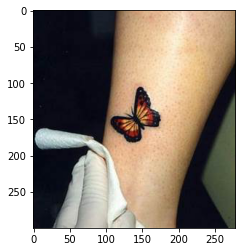

Top 2 image


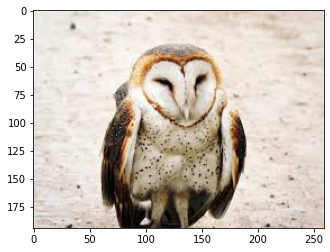

Top 3 image


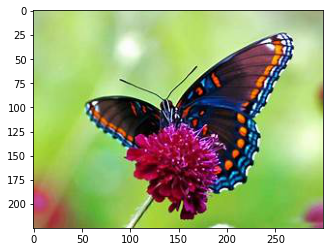

Top 4 image


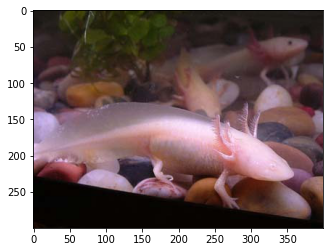

Top 5 image


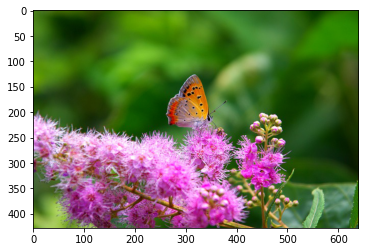

Top 6 image


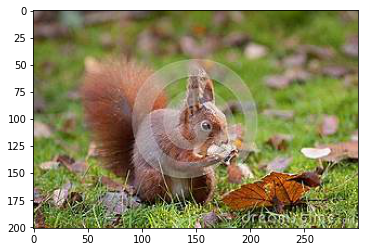

Top 7 image


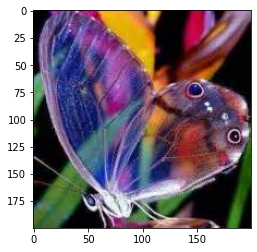

Top 8 image


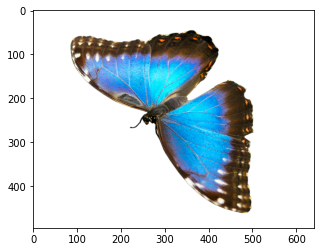

Top 9 image


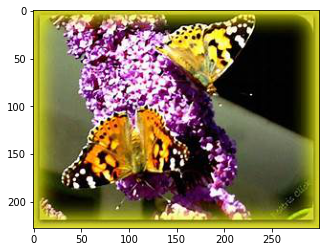

Top 10 image


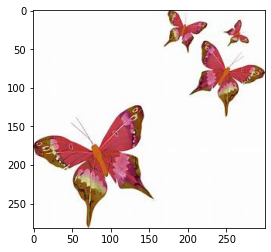

In [86]:
i =1
for x in top10:
  
  print("Top "+str(i)+ " image")
  i=i+1
  img = mpimg.imread(top10[x])
  imgplot = plt.imshow(img)
  plt.show()